In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data_file = pd.read_csv("BreastCancer.csv")

In [3]:
data_file.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [5]:
data_file.shape

(700, 11)

In [6]:
data_file.count()

Sample code number             699
Clump Thickness                699
Uniformity of Cell Size        699
Uniformity of Cell Shape       699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    683
Bland Chromatin                699
Normal Nucleoli                699
Mitoses                        699
Class                          699
dtype: int64

# TO FIND THE MISSING VALUES

In [7]:
data_file.isnull().sum()

Sample code number              1
Clump Thickness                 1
Uniformity of Cell Size         1
Uniformity of Cell Shape        1
Marginal Adhesion               1
Single Epithelial Cell Size     1
Bare Nuclei                    17
Bland Chromatin                 1
Normal Nucleoli                 1
Mitoses                         1
Class                           1
dtype: int64

In [8]:
# DROPPING ROWS THAT HAS MISSING VALUES
data_file= data_file.dropna(how= 'any')

In [9]:
x = data_file[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]

In [10]:
x.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0


In [11]:
x.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [12]:
# EXTRACT THE CLASS FIELD TO PREDICT WHETHER THERE IS CANCER OR NOT
y = data_file['Class']
y.head()

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: Class, dtype: float64

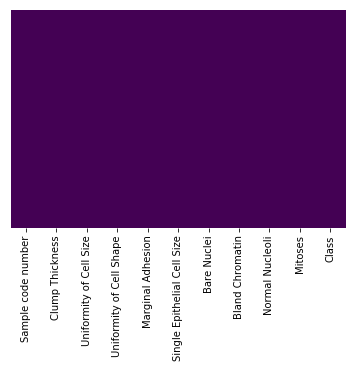

In [13]:
sns.heatmap(data_file.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# CROSS VALIDATION

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# TRAIN LOGISTIC REGRESSION MODEL

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
print("logistic score",logreg.score(x_test,y_test))

logistic score 0.9298245614035088


D:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
# Make Predictions based on x_test and store it to y_pred_class
y_pred_class=logreg.predict(x_test)

# PERFORMING ACCURACY

In [17]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.9298245614035088


In [18]:
# 92.9% of the time our model was able to identify breast cancer based on the training data.

In [19]:
# PREVALENT FACTOR
y_test.value_counts()

2.0    107
4.0     64
Name: Class, dtype: int64

In [20]:
# # Now let us see the percentage of "o" in y_test. This will be the accuracy of a dumb model that predicts 0
1 - y_test.mean()

-1.7485380116959064

# TRAINING AND PREDICTION

In [21]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

D:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
#predictions
predictions = logmodel.predict(x_test)

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         2.0       0.93      0.96      0.94       107
         4.0       0.93      0.88      0.90        64

   micro avg       0.93      0.93      0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

[[103   4]
 [  8  56]]
0.9298245614035088


Classification Result: The classification report displays the Precision, Recall , F1 and Support scores for the model. Precision score means the the level up-to which the prediction made by the model is precise. The precision for Benign Cancer is 0.93 and for Malignant Cancer is 0.93. Recall is the amount up-to which the model can predict the outcome. Recall for Benign Cancer is 0.96 and for Malignant Cancer is 0.88. F1 score is the amount of data tested for the predictions which is 0.94 for Benign Cancer and 0.90 for Malignant Cancer.

# CONFUSION MATRIX

Confusion matrix: Confusion matrix is a table which describes the performance of a prediction model. A confusion matrix contains the actual values and predicted values. we can use these values to calculate the accuracy score of the model.

In [24]:
print (metrics.confusion_matrix(y_test,y_pred_class))

[[103   4]
 [  8  56]]


In [25]:
# MATRIX
#
#                Predicted 0    Predicted 1    Total
#                                
#Actual  0        103              4            107
#Actual  1          8             56             64   

#Total            111             60

In [26]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# VISUALIZATION OF CONFUSION MATRIX

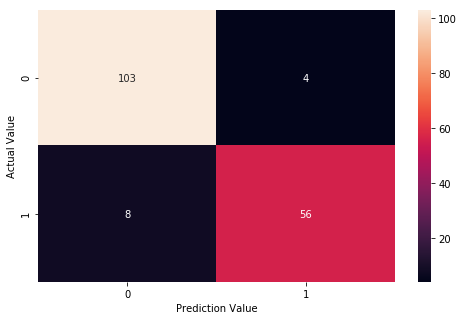

In [27]:
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion,annot = True,fmt=".0f")
plt.xlabel("Prediction Value")
plt.ylabel("Actual Value")
plt.show()

# TO TEST THE SENSITIVITY OF LOGISTIC REGRESSION MODEL

In [28]:
Sensitivity = (TP / (TP + FN))
print (Sensitivity)

0.875


In [29]:
# The Sensitivity of the model is 87.5%

# TO CALCULATE SPECIFICITY

In [30]:
Specificity = (TN / (TN + FP))
print (Specificity)

0.9626168224299065


In [31]:
# The Model has good specificity of 96.2%

# TO CALCULATE FALSE POSITIVE RATE - predicting cancer when patient does not have Cancer

In [32]:
false_positive_rate = 1 - Specificity
print (FP / float(TN+FP))

0.037383177570093455


In [33]:
# It is good with 3.73%

# PRECISION - HOW PRECISE IS THE CANCER PREDICTION

In [34]:
# Positive Predictive Value
print (TP / float(TP+FP))

0.9333333333333333


In [35]:
# Negative Predictive Value
print (TN / float(TN+FN))

0.9279279279279279


In [36]:
# Predicting Cancer based on the data from first 20 rows of x
logreg.predict(x_test)[0:20]

array([2., 2., 4., 4., 2., 2., 2., 4., 2., 2., 4., 2., 4., 2., 2., 2., 4.,
       4., 4., 2.])

# TO PREDICT THE PROBABILITY OF EACH PREDICTION

In [37]:
logreg.predict_proba(x_test)[0:10, :]

array([[0.92925367, 0.07074633],
       [0.97810202, 0.02189798],
       [0.05497953, 0.94502047],
       [0.01971146, 0.98028854],
       [0.98442876, 0.01557124],
       [0.96262046, 0.03737954],
       [0.94219509, 0.05780491],
       [0.00202679, 0.99797321],
       [0.9598277 , 0.0401723 ],
       [0.98330704, 0.01669296]])

In [38]:
# The first column is the probability of it being Benign. Second column is the probablity of it being Malignant.

# ROC AUC VALUE

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt 
import random 
%matplotlib inline 

In [40]:
# calculates the probability of predicting "1" (cancer) and store the output in probability_cancer
proba_cancer=logreg.predict_proba(x_test)[:, 1]

In [41]:
# We need the actual values in the cancer column and the predicted probabilities of positive value "1
roc_auc_score(y_test, proba_cancer)

0.992698598130841

In [42]:
auc = roc_auc_score(y_test, proba_cancer)
print('AUC: %.3f' % auc)

AUC: 0.993


In [43]:
#True Positive Rate
true_positive_rate = TP / (TP + FN)
print (true_positive_rate)

0.875


In [44]:
#False Positive Rate
false_positive_rate = FP/(FP + TN)
print (false_positive_rate)

0.037383177570093455


# SPLITTING THE DATA

The actual data is 'y' which we are going to predict and the rest is going to be 'x'. Set the test size to 33 percent. We use train_test_split from the cross_validation module to split our data. 67%of the data will be training data and 33% will be testing data.

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42) 

# create a %33 test data from original data

print("x train shape:",x_train.shape)
print("x test shape:",x_test.shape)
print("y train shape:",y_train.shape)
print("y test shape:",y_test.shape)

x train shape: (457, 9)
x test shape: (226, 9)
y train shape: (457,)
y test shape: (226,)


# NAIVE BAYES CLASSIFICATION

In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Naive Bayes score",nb.score(x_test,y_test))
plt.show()

Naive Bayes score 0.9690265486725663


# DECISION TREE CLASSIFICATION

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Decision Tree Score",dt.score(x_test,y_test))

Decision Tree Score 0.9336283185840708


# RANDOM FOREST CLASSIFICATION

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state=1)
rf.fit(x_train,y_train)
print("Random Forest Classification Score",rf.score(x_test,y_test))

Random Forest Classification Score 0.9601769911504425


# COMPARISON OF ALGORITHM PERFORMANCE

In [49]:
print("Naive Bayes score :",nb.score(x_test,y_test)*100)
print("Decision Tree Score :",dt.score(x_test,y_test)*100)
print("Random Forest Classification Score :",rf.score(x_test,y_test)*100)

Naive Bayes score : 96.90265486725663
Decision Tree Score : 93.36283185840708
Random Forest Classification Score : 96.01769911504425


In [4]:
from statistics import median